In [34]:
import pandas

data = pandas.read_csv('abalone.csv')
print data.shape
data['Sex'].replace(['F', 'I', 'M'], [-1, 0, 1], inplace=True)
data.head()

(4177, 9)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [35]:
x = data.as_matrix()[:, :-1]
y = data.as_matrix()[:, -1]

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_score
import numpy as np

kf = KFold(len(x), n_folds=5, random_state=1, shuffle=True)
quality = []

for n_estimators in range(1, 50):
    regr = RandomForestRegressor(random_state=1, n_estimators=n_estimators)
    quality.append(np.mean(cross_val_score(estimator=regr, X=x, y=y, cv=kf, scoring='r2')))

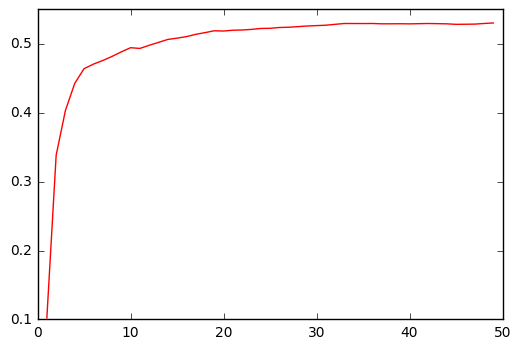

In [39]:
import matplotlib.pyplot as plt
x1 = range(1, 50)
plt.plot(x1, quality, 'r')
plt.show()